# Machine Learning

What is machine learning???? You likely use it every day in your life. Let's start with an example that you should be familiar with and discuss it's applications to machine learning.

Side Note: For this lecture we will focus on supervised learning, unsupervised learning is going beyond the scope of what is feasible in a two hour lecture.

## Linear Regression
![](https://i.ytimg.com/vi/zPG4NjIkCjc/maxresdefault.jpg)

One example that you use in almost every science class is curve fitting. This is a machine learning problem for the following reasons:

1. There is data available connecting the input to the desired output.
2. We want to predict the output for an input not given to us using the given data.
3. We want to minimize the ERROR in this prediction.

The 2nd point is the importaint one, if you continue in this field you will learn that some machine learning techniques called "unsupervised" learning problems do not follow #1, but for the scope of this lecture both of these points are neccessary for machine learning.

To start let's implement a simple algorithm in Python doing a Machine Learning task!

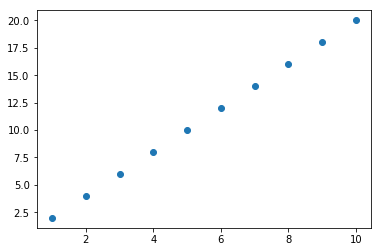

In [1]:
from scipy import stats  # one useful machine learning library
import numpy as np  # useful library for machine learning math (linear algebra)
from matplotlib import pyplot as plt  # useful library for graphing data
import tensorflow as tf

# Let's create the example data connecting input to desired output!
x = [1,2,3,4,5,6,7,8,9,10]
y = [2,4,6,8,10,12,14,16,18,20]

# Let's see what this looks like!
plt.scatter(x,y)  # scatter plot
plt.show()  # show graph


In [6]:
# create and train a machine learning model from the scipy library
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print "y = {}x + {}".format(slope, intercept)
print "error = {}".format(std_err)

y = 2.0x + 0.0
error = 0.0


Wow! We just rained our first machine learning program! Simple Right?!

Let's see what happens if we change the input dataset slightly, so that a linear model cannot properly fit it exactly!

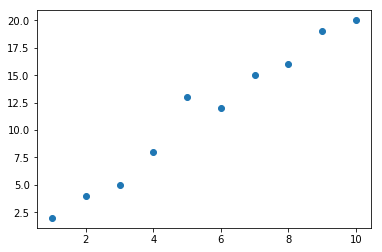

In [2]:
# Let's create the example data connecting input to desired output!
x = [1,2,3,4,5,6,7,8,9,10]
y = [2,4,5,8,13,12,15,16,19,20]

# Let's see what this looks like!
plt.scatter(x,y)  # scatter plot
plt.show()  # show graph

In [3]:
# create and train a machine learning model from the scipy library
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Print the model and it's error
print "y = {}x + {}".format(slope, intercept)
print "error = {}".format(std_err)

y = 2.07272727273x + 0.0
error = 0.122867484441


In this case, error was calculated by how close the predictions of the machine learning tool (in this case a line of best fit) was to the input data. We can see the model did a pretty good job!

# Neural Networks

Linear regression is nice and all, but what happens when we get more and more inputs? What about more outputs? It becomes hard to use a line of best fit model for this. One way engineers have figured this process out is to use a tool called neural networks!

![](https://impekable.com/wp-content/uploads/2017/07/deep-learning-weight-paths.gif)

## Nodes
Let's look at a single node or blob in this network.

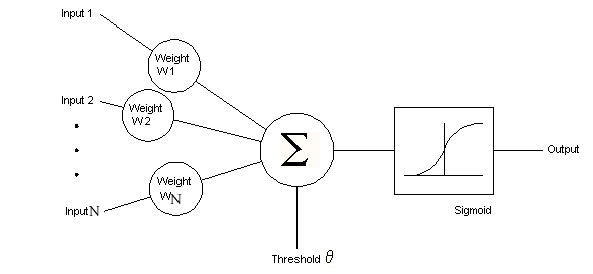

Each node takes multiple input data points, each of these are numbers. It multiplies each of these numbers by a constant (let's call it w), adds all these together, and plugs this number into a fancy function called an "activation function" to get the result.

$$Output = f(\sum_{i=0}^{n} w_i \cdot x_i)$$

Don't worry if you are confused, let's go through an example!

Let's break down the input part.


In [4]:
x = [0.1, 0.2, 0.3, 0.2, 0.1]  # input values
w = [1, 1, 1, 1, 1]  # constant
out = np.dot(x, w) # Equivalent of 1 * .1 + .2 * 1 + .3 * 1 + .2 * 1 + .1 * 1, one way of computing x * w
print "Output of the sumnation is {}".format(out)

out = np.tanh(out)  # hyperbolic tangent is often used as a sigmoid function
print "Output of the sigmoid is {}".format(out)

Output of the sumnation is 0.9
Output of the sigmoid is 0.716297870199


In all neural network nodes, traditionally a "bias" is added. The bias is simply an extra input along with whatever standard inputs go into your network. This extra input is always one and allows the network to shift the output very easily.
## Sigmoid Function

You might be wondering, what is this sigmoid function thing and why is it used. It's just a function that approaches -1 and 1 as it goes to infinity and has this general shape. These functions are useful for constraining the output of the node to a reasonable amount, and is designed to mimic the way the neurons in our brains fire. (Ask me later if you are interested in more details.) We won't need to delve into this much in our implementation.

![](http://www.ire.pw.edu.pl/~rsulej/NetMaker/manual/n01_algorithms/act_functions_bp.gif)

## Universal Approximation Theorem
Ok so we have this neural network node, that takes in some inputs and creates some outputs, but what is so good about that? How can we use it to identify digits, or recognize my dog in a picture? The answer is by putting A LOT of these nodes together.

By putting several neural "nodes" together in a chain like you saw in the first picture in this section, mathematicians have shown you can APPROXIMATE ANY FUNCTION by changing around with the w variable for each node. 
When they say ANY they mean ANY, as in there exists some combination of nodes and weights that can approximate your entire brain! This proof is rather complicated but I will link it below if you are interested.
https://en.wikipedia.org/wiki/Universal_approximation_theorem

# Backpropagation
Alright but how do we find the correct set of weights? Let's assume there are only two weights for the time being and plot a graph called the error vs. weight graph. It will look something like what we have below.

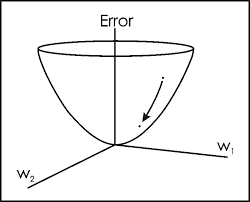


When we "train" a neural network, we calculate the derivative or "slope" of the graph where the current weight is. Once we know this, we move the weights along the slope so that the error "shifts down". This is known as gradient descent.

If you are interested in how this process works in detail please see me later, but this explanation is sufficient for now since our neural network tool calculates most of this for us.

# Review
- A neural network is composed of layers of nodes, each node in the next layer takes the outputs of all the nodes in the first layer as input.
- A neural node takes in multiple inputs, multiplies them by a "weight vector", sums them, and puts them through a sigmoid function.
- Neural networks can be "trained" to learn any function through something known as "backpropagation" which one can think of as figuring out the slope of the error vs. weight curve and moving a little bit down that curve.

Alright let's create our first neural network to learn the XOR logic function.
![](https://cdn-images-1.medium.com/max/800/1*ZbQVdusvAgS50nq0k2aiqA.png)

In [5]:
import tensorflow as tf  # import tensorflow a neural network library by google (takes care of backprop)

# define inputs to network (true, false table for XOR function)
T, F = 1., -1.
train_in = [
 [T, T],
 [T, F],
 [F, T],
 [F, F],
]
train_out = [
 [F],
 [T],
 [T],
 [F],
]

# PSA: TensorFlow does math on the entire Layer rather than node by node
# All operations are done on a "vector" or list of numbers rather than the single numbers we were using in our example
# Same principles apply and I will walk you through it!
# Using tf.Variable to wrap our weights allows for TensorFlow to do backprop automagically

w1 = tf.Variable(tf.random_normal([2, 2])) # define weight matrix for first LAYER (not node)
b1 = tf.Variable(tf.zeros([2]))  # define "weight" for the bias of the first LAYER (not node)

w2 = tf.Variable(tf.random_normal([2, 1]))  # define weight matrix for second LAYER (not node)
b2 = tf.Variable(tf.zeros([1]))  # define "weight" for the bias of the second LAYER (not node)

out1 = tf.tanh(tf.add(tf.matmul(train_in, w1), b1))  # get output of the first layer and put through tanh
out2 = tf.tanh(tf.add(tf.matmul(out1, w2), b2))  # get output of the second layer and put through tanh

# Error function will be the difference in the square of the error between output and desired output
error = tf.subtract(train_out, out2)  
mse = tf.reduce_mean(tf.square(error))

train = tf.train.GradientDescentOptimizer(0.01).minimize(mse) # gradient descent to minimize the error function
sess = tf.Session()  # start a training session
sess.run(tf.initialize_all_variables())  # initialize all variables randomly (weights, bias weights, etc.)
err, target = 1, 0.01  # initialize error variable, and target error < 0.01
epoch, max_epochs = 0, 5000  # max number of "epochs" or iterations over our dataset
while err > target and epoch < max_epochs:  # iterate over dataset
    epoch += 1
    err, x = sess.run([mse, train])  # calculate error and BACKPROPAGATE to get to the proper error
    print(sess.run(out2))
    print "Epoch: {}, MSE: {}".format(epoch, err)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[-0.83080387]
 [ 0.8530131 ]
 [-0.85337669]
 [ 0.83018339]]
Epoch: 1, MSE: 1.71312260628
[[-0.82830423]
 [ 0.85041392]
 [-0.85116524]
 [ 0.8270247 ]]
Epoch: 2, MSE: 1.70870220661
[[-0.82574409]
 [ 0.84773958]
 [-0.84890479]
 [ 0.82376474]]
Epoch: 3, MSE: 1.70417189598
[[-0.82312161]
 [ 0.84498745]
 [-0.84659427]
 [ 0.82039899]]
Epoch: 4, MSE: 1.69952893257
[[-0.82043505]
 [ 0.84215468]
 [-0.8442325 ]
 [ 0.81692296]]
Epoch: 5, MSE: 1.6947696209
[[-0.81768245]
 [ 0.83923852]
 [-0.84181851]
 [ 0.8133319 ]]
Epoch: 6, MSE: 1.68989026546
[[-0.81486195]
 [ 0.83623576]
 [-0.83935148]
 [ 0.8096208 ]]
Epoch: 7, MSE: 1.68488800526
[[-0.81197166]
 [ 0.83314335]
 [-0.83683032]
 [ 0.80578429]]
Epoch: 8, MSE: 1.67975902557
[[-0.80900967]
 [ 0.82995814]
 [-0.83425403]
 [ 0.80181718]]
Epoch: 9, MSE: 1.67449951172
[[-0.80597383]
 [ 0.82667702]
 [-0.83162177]
 [ 0.79771352]]
Epoch: 10, MSE: 1.66910612583
[[-0.80286211]
 [ 0.823296

Epoch: 201, MSE: 0.764897465706
[[-0.16145788]
 [ 0.16866045]
 [-0.03985239]
 [-0.24640311]]
Epoch: 202, MSE: 0.762885451317
[[-0.16286267]
 [ 0.16949545]
 [-0.03881478]
 [-0.24784842]]
Epoch: 203, MSE: 0.760869860649
[[-0.16427943]
 [ 0.17033865]
 [-0.03777826]
 [-0.24928892]]
Epoch: 204, MSE: 0.758851230145
[[-0.16570777]
 [ 0.17118955]
 [-0.03674249]
 [-0.25072429]]
Epoch: 205, MSE: 0.756829380989
[[-0.16714729]
 [ 0.1720482 ]
 [-0.03570705]
 [-0.25215468]]
Epoch: 206, MSE: 0.754804849625
[[-0.16859792]
 [ 0.17291425]
 [-0.03467154]
 [-0.25357997]]
Epoch: 207, MSE: 0.752777338028
[[-0.17005892]
 [ 0.17378736]
 [-0.0336355 ]
 [-0.25500008]]
Epoch: 208, MSE: 0.750747084618
[[-0.17153011]
 [ 0.17466708]
 [-0.03259859]
 [-0.25641504]]
Epoch: 209, MSE: 0.748714148998
[[-0.17301115]
 [ 0.17555375]
 [-0.03156041]
 [-0.2578246 ]]
Epoch: 210, MSE: 0.746678829193
[[-0.17450182]
 [ 0.17644653]
 [-0.03052063]
 [-0.25922886]]
Epoch: 211, MSE: 0.744640827179
[[-0.17600161]
 [ 0.17734541]
 [-0.029

[[-0.57973409]
 [ 0.48533386]
 [ 0.39896879]
 [-0.58145732]]
Epoch: 488, MSE: 0.245611384511
[[-0.58075088]
 [ 0.48642477]
 [ 0.40039662]
 [-0.58242524]]
Epoch: 489, MSE: 0.244480282068
[[-0.58176363]
 [ 0.48751286]
 [ 0.40181974]
 [-0.58338982]]
Epoch: 490, MSE: 0.243355557323
[[-0.58277237]
 [ 0.48859784]
 [ 0.40323782]
 [-0.58435124]]
Epoch: 491, MSE: 0.242237120867
[[-0.58377701]
 [ 0.48967975]
 [ 0.40465143]
 [-0.58530945]]
Epoch: 492, MSE: 0.241125002503
[[-0.58477777]
 [ 0.49075872]
 [ 0.40606013]
 [-0.58626449]]
Epoch: 493, MSE: 0.240019142628
[[-0.5857746 ]
 [ 0.4918344 ]
 [ 0.40746403]
 [-0.5872162 ]]
Epoch: 494, MSE: 0.238919481635
[[-0.58676744]
 [ 0.49290723]
 [ 0.40886307]
 [-0.58816475]]
Epoch: 495, MSE: 0.237826064229
[[-0.58775645]
 [ 0.4939768 ]
 [ 0.41025761]
 [-0.58911002]]
Epoch: 496, MSE: 0.236738845706
[[-0.5887413 ]
 [ 0.49504319]
 [ 0.41164726]
 [-0.59005213]]
Epoch: 497, MSE: 0.235657721758
[[-0.58972222]
 [ 0.49610642]
 [ 0.41303194]
 [-0.59099084]]
Epoch: 49

[[-0.66132367]
 [ 0.57631069]
 [ 0.51573938]
 [-0.66066849]]
Epoch: 585, MSE: 0.161605671048
[[-0.66200554]
 [ 0.57709533]
 [ 0.5167293 ]
 [-0.66134089]]
Epoch: 586, MSE: 0.16096714139
[[-0.66268456]
 [ 0.57787681]
 [ 0.5177151 ]
 [-0.66201067]]
Epoch: 587, MSE: 0.160332292318
[[-0.66336101]
 [ 0.57865542]
 [ 0.51869702]
 [-0.662678  ]]
Epoch: 588, MSE: 0.159701302648
[[-0.66403443]
 [ 0.57943135]
 [ 0.5196752 ]
 [-0.66334248]]
Epoch: 589, MSE: 0.15907394886
[[-0.66470516]
 [ 0.58020425]
 [ 0.52064943]
 [-0.66400439]]
Epoch: 590, MSE: 0.158450260758
[[-0.66537315]
 [ 0.5809744 ]
 [ 0.52161962]
 [-0.66466367]]
Epoch: 591, MSE: 0.157830283046
[[-0.66603839]
 [ 0.58174163]
 [ 0.52258623]
 [-0.66532052]]
Epoch: 592, MSE: 0.157213956118
[[-0.66670084]
 [ 0.582506  ]
 [ 0.52354884]
 [-0.66597456]]
Epoch: 593, MSE: 0.156601160765
[[-0.66736078]
 [ 0.58326763]
 [ 0.5245077 ]
 [-0.66662604]]
Epoch: 594, MSE: 0.1559920609
[[-0.6680178 ]
 [ 0.58402646]
 [ 0.52546269]
 [-0.66727525]]
Epoch: 595, M

[[-0.75821108]
 [ 0.69066739]
 [ 0.65710205]
 [-0.75717533]]
Epoch: 791, MSE: 0.0828899294138
[[-0.75852913]
 [ 0.69105154]
 [ 0.65756643]
 [-0.75749439]]
Epoch: 792, MSE: 0.0826728418469
[[-0.75884622]
 [ 0.69143462]
 [ 0.65802878]
 [-0.75781232]]
Epoch: 793, MSE: 0.0824567675591
[[-0.75916225]
 [ 0.69181669]
 [ 0.65849006]
 [-0.7581293 ]]
Epoch: 794, MSE: 0.0822417289019
[[-0.75947726]
 [ 0.6921975 ]
 [ 0.65894961]
 [-0.7584455 ]]
Epoch: 795, MSE: 0.0820275619626
[[-0.75979149]
 [ 0.69257694]
 [ 0.65940768]
 [-0.75876039]]
Epoch: 796, MSE: 0.0818143785
[[-0.76010436]
 [ 0.69295573]
 [ 0.65986443]
 [-0.75907457]]
Epoch: 797, MSE: 0.0816021859646
[[-0.76041651]
 [ 0.69333279]
 [ 0.66031963]
 [-0.75938761]]
Epoch: 798, MSE: 0.0813908427954
[[-0.76072752]
 [ 0.69370896]
 [ 0.66077346]
 [-0.75969976]]
Epoch: 799, MSE: 0.0811805278063
[[-0.76103765]
 [ 0.69408405]
 [ 0.66122568]
 [-0.76001078]]
Epoch: 800, MSE: 0.0809710919857
[[-0.76134676]
 [ 0.69445801]
 [ 0.66167635]
 [-0.7603209 ]]
Ep

Epoch: 891, MSE: 0.0651977956295
[[-0.78588903]
 [ 0.72430801]
 [ 0.69741213]
 [-0.78496546]]
Epoch: 892, MSE: 0.0650547146797
[[-0.78612429]
 [ 0.72459567]
 [ 0.69775397]
 [-0.78520179]]
Epoch: 893, MSE: 0.0649122148752
[[-0.78635889]
 [ 0.72488266]
 [ 0.69809496]
 [-0.78543782]]
Epoch: 894, MSE: 0.0647703260183
[[-0.78659284]
 [ 0.72516894]
 [ 0.69843507]
 [-0.78567296]]
Epoch: 895, MSE: 0.0646289139986
[[-0.78682619]
 [ 0.72545451]
 [ 0.69877416]
 [-0.78590745]]
Epoch: 896, MSE: 0.0644880533218
[[-0.78705883]
 [ 0.7257393 ]
 [ 0.69911242]
 [-0.78614116]]
Epoch: 897, MSE: 0.0643477290869
[[-0.78729087]
 [ 0.7260232 ]
 [ 0.69944942]
 [-0.78637439]]
Epoch: 898, MSE: 0.0642079561949
[[-0.78752238]
 [ 0.72630626]
 [ 0.69978577]
 [-0.78660703]]
Epoch: 899, MSE: 0.0640687569976
[[-0.78775316]
 [ 0.72658879]
 [ 0.70012122]
 [-0.78683901]]
Epoch: 900, MSE: 0.0639300346375
[[-0.7879833 ]
 [ 0.72687054]
 [ 0.70045543]
 [-0.78707033]]
Epoch: 901, MSE: 0.0637918263674
[[-0.78821278]
 [ 0.7271515

Epoch: 1102, MSE: 0.043887142092
[[-0.82436174]
 [ 0.77177209]
 [ 0.75311488]
 [-0.82365763]]
Epoch: 1103, MSE: 0.043816678226
[[-0.82450294]
 [ 0.7719478 ]
 [ 0.75331843]
 [-0.82379973]]
Epoch: 1104, MSE: 0.043746419251
[[-0.82464367]
 [ 0.7721231 ]
 [ 0.75352138]
 [-0.82394147]]
Epoch: 1105, MSE: 0.0436763390899
[[-0.8247844 ]
 [ 0.77229804]
 [ 0.75372392]
 [-0.82408285]]
Epoch: 1106, MSE: 0.0436065085232
[[-0.82492453]
 [ 0.77247256]
 [ 0.75392598]
 [-0.82422411]]
Epoch: 1107, MSE: 0.0435368604958
[[-0.82506454]
 [ 0.77264684]
 [ 0.75412768]
 [-0.82436484]]
Epoch: 1108, MSE: 0.0434674322605
[[-0.82520419]
 [ 0.77282071]
 [ 0.75432909]
 [-0.82450521]]
Epoch: 1109, MSE: 0.043398194015
[[-0.82534355]
 [ 0.77299422]
 [ 0.75453001]
 [-0.8246457 ]]
Epoch: 1110, MSE: 0.0433291569352
[[-0.82548255]
 [ 0.77316743]
 [ 0.75473046]
 [-0.82478547]]
Epoch: 1111, MSE: 0.0432602874935
[[-0.82562149]
 [ 0.77334028]
 [ 0.7549305 ]
 [-0.82492536]]
Epoch: 1112, MSE: 0.0431916564703
[[-0.82575995]
 [ 0.

[[-0.83748978]
 [ 0.78815871]
 [ 0.77200758]
 [-0.83686769]]
Epoch: 1206, MSE: 0.037522636354
[[-0.83760482]
 [ 0.78830266]
 [ 0.77217287]
 [-0.83698332]]
Epoch: 1207, MSE: 0.0374697484076
[[-0.83771944]
 [ 0.78844631]
 [ 0.77233762]
 [-0.83709878]]
Epoch: 1208, MSE: 0.0374168977141
[[-0.837834  ]
 [ 0.7885896 ]
 [ 0.77250195]
 [-0.83721399]]
Epoch: 1209, MSE: 0.0373642295599
[[-0.83794832]
 [ 0.78873265]
 [ 0.7726661 ]
 [-0.83732909]]
Epoch: 1210, MSE: 0.0373117029667
[[-0.83806235]
 [ 0.78887546]
 [ 0.77283007]
 [-0.83744383]]
Epoch: 1211, MSE: 0.0372592918575
[[-0.83817613]
 [ 0.78901809]
 [ 0.77299345]
 [-0.83755839]]
Epoch: 1212, MSE: 0.0372070148587
[[-0.8382898 ]
 [ 0.78916037]
 [ 0.77315682]
 [-0.83767277]]
Epoch: 1213, MSE: 0.0371548980474
[[-0.83840322]
 [ 0.78930259]
 [ 0.77331972]
 [-0.83778691]]
Epoch: 1214, MSE: 0.0371028743684
[[-0.83851641]
 [ 0.78944421]
 [ 0.77348226]
 [-0.83790076]]
Epoch: 1215, MSE: 0.0370509885252
[[-0.83862936]
 [ 0.78958589]
 [ 0.77364445]
 [-0.8

[[-0.85244018]
 [ 0.80693871]
 [ 0.79343951]
 [-0.85191214]]
Epoch: 1354, MSE: 0.0309480838478
[[-0.85252881]
 [ 0.80705065]
 [ 0.79356647]
 [-0.85200149]]
Epoch: 1355, MSE: 0.0309109538794
[[-0.85261738]
 [ 0.80716217]
 [ 0.79369307]
 [-0.8520906 ]]
Epoch: 1356, MSE: 0.0308738909662
[[-0.85270584]
 [ 0.80727357]
 [ 0.79381955]
 [-0.85217977]]
Epoch: 1357, MSE: 0.0308369528502
[[-0.85279411]
 [ 0.80738491]
 [ 0.79394579]
 [-0.85226852]]
Epoch: 1358, MSE: 0.030800063163
[[-0.85288227]
 [ 0.80749613]
 [ 0.79407197]
 [-0.85235703]]
Epoch: 1359, MSE: 0.0307632684708
[[-0.85297036]
 [ 0.80760694]
 [ 0.7941978 ]
 [-0.85244566]]
Epoch: 1360, MSE: 0.0307265408337
[[-0.85305816]
 [ 0.80771774]
 [ 0.7943235 ]
 [-0.85253406]]
Epoch: 1361, MSE: 0.0306899100542
[[-0.85314578]
 [ 0.80782837]
 [ 0.79444891]
 [-0.85262221]]
Epoch: 1362, MSE: 0.0306533500552
[[-0.85323334]
 [ 0.80793875]
 [ 0.79457414]
 [-0.85271055]]
Epoch: 1363, MSE: 0.0306168906391
[[-0.85332084]
 [ 0.80804914]
 [ 0.79469913]
 [-0.8

[[-0.86929178]
 [ 0.82826096]
 [ 0.81748354]
 [-0.86886686]]
Epoch: 1578, MSE: 0.0242954511195
[[-0.86935556]
 [ 0.82834202]
 [ 0.81757432]
 [-0.86893094]]
Epoch: 1579, MSE: 0.0242717750371
[[-0.8694194 ]
 [ 0.82842296]
 [ 0.81766504]
 [-0.86899519]]
Epoch: 1580, MSE: 0.0242481641471
[[-0.86948293]
 [ 0.82850373]
 [ 0.81775552]
 [-0.86905915]]
Epoch: 1581, MSE: 0.0242245681584
[[-0.86954653]
 [ 0.82858455]
 [ 0.817846  ]
 [-0.86912298]]
Epoch: 1582, MSE: 0.0242010578513
[[-0.86961007]
 [ 0.82866514]
 [ 0.81793618]
 [-0.86918682]]
Epoch: 1583, MSE: 0.0241775587201
[[-0.86967349]
 [ 0.8287456 ]
 [ 0.8180266 ]
 [-0.86925066]]
Epoch: 1584, MSE: 0.0241541229188
[[-0.86973667]
 [ 0.82882601]
 [ 0.81811655]
 [-0.86931437]]
Epoch: 1585, MSE: 0.0241306945682
[[-0.86979997]
 [ 0.82890642]
 [ 0.81820649]
 [-0.86937791]]
Epoch: 1586, MSE: 0.0241073481739
[[-0.86986309]
 [ 0.82898641]
 [ 0.81829631]
 [-0.86944151]]
Epoch: 1587, MSE: 0.0240840185434
[[-0.86992615]
 [ 0.82906675]
 [ 0.81838602]
 [-0.

[[-0.88237172]
 [ 0.84492385]
 [ 0.83605838]
 [-0.88202214]]
Epoch: 1815, MSE: 0.019686087966
[[-0.88241935]
 [ 0.84498495]
 [ 0.83612615]
 [-0.8820703 ]]
Epoch: 1816, MSE: 0.0196701623499
[[-0.88246697]
 [ 0.8450458 ]
 [ 0.83619362]
 [-0.88211828]]
Epoch: 1817, MSE: 0.0196542330086
[[-0.88251472]
 [ 0.8451066 ]
 [ 0.83626103]
 [-0.88216609]]
Epoch: 1818, MSE: 0.0196383595467
[[-0.88256222]
 [ 0.84516758]
 [ 0.83632857]
 [-0.88221389]]
Epoch: 1819, MSE: 0.0196225084364
[[-0.88260972]
 [ 0.84522837]
 [ 0.83639586]
 [-0.88226175]]
Epoch: 1820, MSE: 0.0196066536009
[[-0.88265717]
 [ 0.84528893]
 [ 0.83646321]
 [-0.8823095 ]]
Epoch: 1821, MSE: 0.0195908360183
[[-0.88270468]
 [ 0.84534955]
 [ 0.83653027]
 [-0.8823573 ]]
Epoch: 1822, MSE: 0.019575048238
[[-0.882752  ]
 [ 0.84541011]
 [ 0.8365975 ]
 [-0.88240469]]
Epoch: 1823, MSE: 0.0195592790842
[[-0.88279927]
 [ 0.84547061]
 [ 0.83666444]
 [-0.88245231]]
Epoch: 1824, MSE: 0.0195435397327
[[-0.88284647]
 [ 0.84553093]
 [ 0.83673149]
 [-0.88

[[-0.88693839]
 [ 0.85076582]
 [ 0.84252506]
 [-0.8866145 ]]
Epoch: 1916, MSE: 0.0181908346713
[[-0.88698125]
 [ 0.8508206 ]
 [ 0.84258562]
 [-0.88665748]]
Epoch: 1917, MSE: 0.0181770995259
[[-0.88702404]
 [ 0.85087532]
 [ 0.84264612]
 [-0.88670045]]
Epoch: 1918, MSE: 0.0181633867323
[[-0.88706654]
 [ 0.85093004]
 [ 0.8427065 ]
 [-0.88674343]]
Epoch: 1919, MSE: 0.0181496925652
[[-0.88710922]
 [ 0.85098457]
 [ 0.84276682]
 [-0.88678634]]
Epoch: 1920, MSE: 0.0181360282004
[[-0.8871519 ]
 [ 0.85103923]
 [ 0.84282708]
 [-0.88682926]]
Epoch: 1921, MSE: 0.018122382462
[[-0.88719457]
 [ 0.85109359]
 [ 0.8428874 ]
 [-0.88687199]]
Epoch: 1922, MSE: 0.0181087367237
[[-0.88723701]
 [ 0.85114801]
 [ 0.8429476 ]
 [-0.88691473]]
Epoch: 1923, MSE: 0.0180951245129
[[-0.88727963]
 [ 0.85120255]
 [ 0.84300756]
 [-0.88695747]]
Epoch: 1924, MSE: 0.0180815346539
[[-0.88732201]
 [ 0.85125685]
 [ 0.84306759]
 [-0.88700008]]
Epoch: 1925, MSE: 0.0180679503828
[[-0.88736427]
 [ 0.85131109]
 [ 0.84312755]
 [-0.8

[[-0.89490187]
 [ 0.86098117]
 [ 0.8537792 ]
 [-0.89462054]]
Epoch: 2122, MSE: 0.015724722296
[[-0.8949368 ]
 [ 0.86102623]
 [ 0.85382849]
 [-0.89465553]]
Epoch: 2123, MSE: 0.015714302659
[[-0.89497173]
 [ 0.86107093]
 [ 0.85387772]
 [-0.89469081]]
Epoch: 2124, MSE: 0.01570388861
[[-0.89500654]
 [ 0.86111581]
 [ 0.85392702]
 [-0.8947258 ]]
Epoch: 2125, MSE: 0.0156934913248
[[-0.89504141]
 [ 0.86116064]
 [ 0.85397607]
 [-0.89476085]]
Epoch: 2126, MSE: 0.0156831052154
[[-0.89507627]
 [ 0.86120534]
 [ 0.85402519]
 [-0.89479578]]
Epoch: 2127, MSE: 0.0156727358699
[[-0.89511102]
 [ 0.86124998]
 [ 0.85407424]
 [-0.8948307 ]]
Epoch: 2128, MSE: 0.0156623795629
[[-0.89514571]
 [ 0.86129469]
 [ 0.85412323]
 [-0.89486551]]
Epoch: 2129, MSE: 0.0156520418823
[[-0.89518034]
 [ 0.86133915]
 [ 0.85417211]
 [-0.89490044]]
Epoch: 2130, MSE: 0.0156417191029
[[-0.89521503]
 [ 0.86138368]
 [ 0.85422111]
 [-0.89493531]]
Epoch: 2131, MSE: 0.0156314205378
[[-0.89524961]
 [ 0.86142832]
 [ 0.85426998]
 [-0.8949

[[-0.90389723]
 [ 0.87256563]
 [ 0.86645526]
 [-0.90366143]]
Epoch: 2414, MSE: 0.0131550654769
[[-0.90392441]
 [ 0.87260062]
 [ 0.86649352]
 [-0.90368867]]
Epoch: 2415, MSE: 0.0131476456299
[[-0.90395164]
 [ 0.8726356 ]
 [ 0.86653173]
 [-0.90371609]]
Epoch: 2416, MSE: 0.0131402444094
[[-0.90397871]
 [ 0.87267071]
 [ 0.86657006]
 [-0.90374339]]
Epoch: 2417, MSE: 0.0131328366697
[[-0.90400583]
 [ 0.8727057 ]
 [ 0.86660802]
 [-0.90377057]]
Epoch: 2418, MSE: 0.0131254307926
[[-0.90403295]
 [ 0.87274063]
 [ 0.86664623]
 [-0.90379769]]
Epoch: 2419, MSE: 0.0131180603057
[[-0.90406001]
 [ 0.87277555]
 [ 0.8666845 ]
 [-0.90382499]]
Epoch: 2420, MSE: 0.0131106842309
[[-0.90408713]
 [ 0.87281042]
 [ 0.86672246]
 [-0.90385228]]
Epoch: 2421, MSE: 0.0131032997742
[[-0.90411419]
 [ 0.87284541]
 [ 0.86676043]
 [-0.90387946]]
Epoch: 2422, MSE: 0.0130959376693
[[-0.90414107]
 [ 0.87288022]
 [ 0.8667987 ]
 [-0.9039064 ]]
Epoch: 2423, MSE: 0.0130885792896
[[-0.90416807]
 [ 0.87291503]
 [ 0.86683649]
 [-0.

[[-0.91082197]
 [ 0.8815161 ]
 [ 0.87618804]
 [-0.91061908]]
Epoch: 2697, MSE: 0.0113329729065
[[-0.91084409]
 [ 0.88154453]
 [ 0.8762188 ]
 [-0.91064107]]
Epoch: 2698, MSE: 0.0113273765892
[[-0.91086608]
 [ 0.88157302]
 [ 0.87624973]
 [-0.91066325]]
Epoch: 2699, MSE: 0.0113218193874
[[-0.91088814]
 [ 0.88160151]
 [ 0.87628073]
 [-0.9106853 ]]
Epoch: 2700, MSE: 0.0113162472844
[[-0.91091001]
 [ 0.88163012]
 [ 0.87631154]
 [-0.91070741]]
Epoch: 2701, MSE: 0.0113106751814
[[-0.91093189]
 [ 0.88165838]
 [ 0.87634236]
 [-0.91072947]]
Epoch: 2702, MSE: 0.0113051142544
[[-0.91095394]
 [ 0.88168675]
 [ 0.87637323]
 [-0.91075146]]
Epoch: 2703, MSE: 0.0112995775416
[[-0.91097587]
 [ 0.8817153 ]
 [ 0.87640405]
 [-0.91077358]]
Epoch: 2704, MSE: 0.0112940268591
[[-0.91099781]
 [ 0.88174367]
 [ 0.8764348 ]
 [-0.91079557]]
Epoch: 2705, MSE: 0.0112884696573
[[-0.91101968]
 [ 0.8817721 ]
 [ 0.87646562]
 [-0.91081744]]
Epoch: 2706, MSE: 0.0112829338759
[[-0.9110415 ]
 [ 0.88180029]
 [ 0.87649626]
 [-0.

Epoch: 2951, MSE: 0.0100671108812
[[-0.91598529]
 [ 0.8882091 ]
 [ 0.8834306 ]
 [-0.91580528]]
Epoch: 2952, MSE: 0.0100626656786
[[-0.91600406]
 [ 0.88823313]
 [ 0.88345665]
 [-0.91582388]]
Epoch: 2953, MSE: 0.0100582130253
[[-0.91602254]
 [ 0.88825732]
 [ 0.88348269]
 [-0.91584259]]
Epoch: 2954, MSE: 0.0100537817925
[[-0.91604125]
 [ 0.8882814 ]
 [ 0.88350874]
 [-0.91586119]]
Epoch: 2955, MSE: 0.0100493477657
[[-0.91605961]
 [ 0.8883056 ]
 [ 0.88353473]
 [-0.91587996]]
Epoch: 2956, MSE: 0.0100449174643
[[-0.91607821]
 [ 0.88832963]
 [ 0.88356078]
 [-0.9158985 ]]
Epoch: 2957, MSE: 0.0100404918194
[[-0.91609687]
 [ 0.88835377]
 [ 0.88358682]
 [-0.91591716]]
Epoch: 2958, MSE: 0.0100360736251
[[-0.91611534]
 [ 0.88837779]
 [ 0.88361281]
 [-0.91593581]]
Epoch: 2959, MSE: 0.0100316423923
[[-0.91613382]
 [ 0.88840187]
 [ 0.88363892]
 [-0.91595459]]
Epoch: 2960, MSE: 0.0100272297859
[[-0.91615248]
 [ 0.88842577]
 [ 0.88366467]
 [-0.91597307]]
Epoch: 2961, MSE: 0.0100228032097
[[-0.9161709 ]
 

# GO DEEPER

We trained our first neural network! Now let's talk about how we can use these techniques for dealing with images.

## Convolutional Neural Networks

## How does it work? 

![alt text](https://images.nature.com/w926/nature-assets/srep/2016/160610/srep27755/images_hires/srep27755-f1.jpg "Logo Title Text 1")
![alt text](https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/jcr:content/mainParsys/image_copy.adapt.full.high.jpg/1497876372993.jpg "Logo Title Text 1")

### Step 1 - Prepare a dataset of images

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png "Logo Title Text 1")

- Every image is a matrix of pixel values. 
- The range of values that can be encoded in each pixel depends upon its bit size. 
- Most commonly, we have 8 bit or 1 Byte-sized pixels. Thus the possible range of values a single pixel can represent is [0, 255]. 
- However, with coloured images, particularly RGB (Red, Green, Blue)-based images, the presence of separate colour channels (3 in the case of RGB images) introduces an additional ‘depth’ field to the data, making the input 3-dimensional. 
- Hence, for a given RGB image of size, say 255×255 (Width x Height) pixels, we’ll have 3 matrices associated with each image, one for each of the colour channels. 
- Thus the image in it’s entirety, constitutes a 3-dimensional structure called the Input Volume (255x255x3).

Great training datasets are [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html) and [CoCo](http://mscoco.org/). We'll use CIFAR.

### Step 2 - Convolution 

![alt text](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/more_images/Convolution_schematic.gif "Logo Title Text 1")

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure_2.png "Logo Title Text 1")

- A convolution is an orderly procedure where two sources of information are intertwined.

- A kernel (also called a filter) is a smaller-sized matrix in comparison to the input dimensions of the image, that consists of real valued entries.

- Kernels are then convolved with the input volume to obtain so-called ‘activation maps’ (also called feature maps).  
- Activation maps indicate ‘activated’ regions, i.e. regions where features specific to the kernel have been detected in the input. 

- The real values of the kernel matrix change with each learning iteration over the training set, indicating that the network is learning to identify which regions are of significance for extracting features from the data.

- We compute the dot product between the kernel and the input matrix. -The convolved value obtained by summing the resultant terms from the dot product forms a single entry in the activation matrix. 

- The patch selection is then slided (towards the right, or downwards when the boundary of the matrix is reached) by a certain amount called the ‘stride’ value, and the process is repeated till the entire input image has been processed. - The process is carried out for all colour channels.

- instead of connecting each neuron to all possible pixels, we specify a 2 dimensional region called the ‘receptive field[14]’ (say of size 5×5 units) extending to the entire depth of the input (5x5x3 for a 3 colour channel input), within which the encompassed pixels are fully connected to the neural network’s input layer. It’s over these small regions that the network layer cross-sections (each consisting of several neurons (called ‘depth columns’)) operate and produce the activation map. (reduces computational complexity)

![alt text](http://i.imgur.com/g4hRI6Z.png "Logo Title Text 1")
![alt text](http://i.imgur.com/tpQvMps.jpg "Logo Title Text 1")
![alt text](http://i.imgur.com/oyXkhHi.jpg "Logo Title Text 1")
![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure_5.png "Logo Title Text 1")

Great resource on description of  convolution (discrete vs continous)  & the fourier transform

http://timdettmers.com/2015/03/26/convolution-deep-learning/


###  Step 3 - Pooling
![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure_6.png "Logo Title Text 1")

- Pooling reducing the spatial dimensions (Width x Height) of the Input Volume for the next Convolutional Layer. It does not affect the depth dimension of the Volume.  
- The transformation is either performed by taking the maximum value from the values observable in the window (called ‘max pooling’), or by taking the average of the values. Max pooling has been favoured over others due to its better performance characteristics.
- also called downsampling

###  Step 4 - Normalization (ReLU in our case)

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/CodeCogsEqn-3.png "Logo Title Text 1")

Normalization (keep the math from breaking by turning all negative numbers to 0)  (RELU) a stack of images becomes a stack of images with no negative values. 

Repeat Steps 2-4 several times. More, smaller images (feature maps created at every layer)

### Step 5 - Regularization 

- Dropout forces an artificial neural network to learn multiple independent representations of the same data by alternately randomly disabling neurons in the learning phase.
- Dropout is a vital feature in almost every state-of-the-art neural network implementation.
- To perform dropout on a layer, you randomly set some of the layer's values to 0 during forward propagation.

See [this](http://iamtrask.github.io/2015/07/28/dropout/)

![alt text](https://i.stack.imgur.com/CewjH.png "Logo Title Text 1")

###  Step 6 - Probability Conversion

At the very end of our network (the tail), we'll apply a softmax function to convert the outputs to probability values for each class. 

![alt text](https://1.bp.blogspot.com/-FHDU505euic/Vs1iJjXHG0I/AAAAAAABVKg/x4g0FHuz7_A/s1600/softmax.JPG "Logo Title Text 1")


###  Step 7 - Choose most likely label (max probability value) 

argmax(softmax_outputs)

These 7 steps are one forward pass through the network.

## So how do we learn the magic numbers? 

- We can learn features and weight values through backpropagation

The other hyperparameters are set by humans and they are an active field of research (finding the optimal ones)

i.e -  number of neurons, number of features, size of features, poooling window size, window stride


## When is a good time to use it?

- To classify images
- To generate images (more on that later..)

But can also be applied to any any spatial 2D or 3D data. Images. Even sound and text. A rule of thumb is if you data is just as useful if you swap out the rows and columns, like customer data, then you can't use a CNN.


Using TensorFlow backend.


[5]


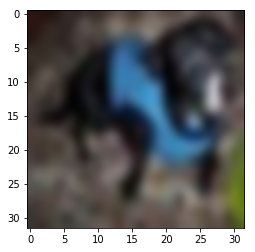

x_train shape: (5000, 32, 32, 3)
5000 train samples
1000 test samples


In [6]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10  # import dataset
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os

batch_size = 32  # in the last example we trained all the data at once, here there is too much data to do that so
# we only use 32 "batches" at once

num_classes = 10 # how many classes we are sorting between
epochs = 5  # how many epochs to train
save_dir = os.path.join(os.getcwd(), 'saved_models') 
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[0:5000]
y_train = y_train[0:5000]
x_test = x_test[0:1000]
y_test = y_test[0:1000]

plt.imshow(x_train[27], interpolation='bicubic')  # pick a random image to see
print(y_train[27])  # display that answer
plt.show()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices. (change data format)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Cool! this totally looks like a dog, and according to the CIFAR-10 dataset a dog is the 5th label so this is absolutely correct!

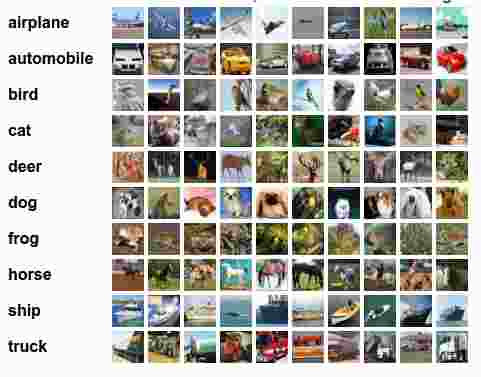

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',  # conv with 32 channel output size
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))  # conv with 32 channel output size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # max pool 2d with 2x2 filter
model.add(Dropout(0.25))  # random noise

model.add(Conv2D(64, (3, 3), padding='same'))  # 64 output channels, 3x3 filter
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))  # 64 output channels, 3x3 filter
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling w/ 2x2 filter
model.add(Dropout(0.25))  # Add random noise to the data

model.add(Flatten())  # Flattens data from 2D matrix into 1D array
model.add(Dense(512))  # one standard neural network layer (from first section)
model.add(Activation('relu')) # RELU
model.add(Dropout(0.5))  # Add random noise to data
model.add(Dense(num_classes))  # one standard neural network layer (from first section)
model.add(Activation('softmax'))  # softmax function (for probabilities)

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255  # take the 0-255 inputs and move them into 0-1 space
x_test /= 255

model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Network Architecture

- Network architecture is still a VERY active area of research, for ex. see my paper on it (https://arxiv.org/abs/1709.05581)
- It is beyond the scope of our use in robotics, so the best course of action for our use would likely be to take some network architectures available online.


## How can we use it for the mock competition?

- CV teams can join together to create a labeled dataset with the spinner in different conditions.
- We can train a deep neural network together to recognize the orientation of the spinner at different positions.
- This neural network can be shared across teams (use the saved weight files)
- This information can then be sent to the RoboRIO using NetworkTables